# Deep Neural Network on Image Dataset

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

We will be building a Neural Network to classify the images.

Here's a sample of the images:
<br>
<center><img src="https://paperswithcode.com/media/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width="75%"/></center>

Learn more the dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html) and [here](https://www.kaggle.com/c/cifar-10).

## Part 1: Setup CIFAR data

1. The dataset can be loaded using the `cifar10.load_data()` function. It's already split into training and test sets. Run the following code to load in the data and then determine the shape of each of the four numpy arrays.

In [12]:
from keras.datasets import cifar10
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


2. Note that the feature matrices have four dimensions. Typically we have two dimensions: datapoints by features. In this case we have these four dimensions: datapoints, rows of image, column of image, rgb values. So `X_train[0]` is the first datapoint and will rgb values for each pixel. Since the images are 33 by 33, there will be 33 by 33 rgb values. Thus `X_train[0][0]` is the first row of pixels of the first datapoint. Print the rgb values of the first pixel of the first datapoint.

In [7]:
#print(X_train[0][1][1])

[0 0 0]


3. Run the following code to view 9 random images from the dataset.

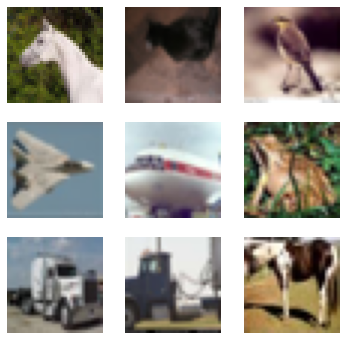

In [13]:
from random import randint
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for i in range(0, 9):
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(X_train[randint(0, X_train.shape[0] - 1)])

4. What the unique values in the target array? How many are there?

    Note that typically we have had two classes for classification problems but this is different!

In [14]:
values, counts = np.unique(y_train, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


5. Instead of using integer values for the target array, we need values to be either 0 or 1. We can do this by instead using a 2d array for the target values that looks like this:

    |   | airplane | automobile | bird | ... |
    |---|----------|------------|------|-----|
    | 0 | 0        | 0          | 1    | ... |
    | 1 | 1        | 0          | 0    | ... |
    | 2 | 1        | 0          | 0    | ... |
    
    Each row has exactly one 1. Here, datapoint 0 is a bird and datapoints 1 and 2 are airplanes.

    Convert the class vectors to binary class matrices with keras's `to_categorical` function. Create new target arrays: `y_train_bin` and `y_test_bin`

In [15]:
from keras.utils import to_categorical

y_train_bin = to_categorical(y_train)
y_test_bin = to_categorical(y_test)

6. Look at the first value in `y_train` and `y_train_bin` and verify that it looks correct.

In [19]:
print(y_train[0])
print(y_train_bin[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


7. What are the max and min values of the feature matrices?

In [23]:
print('Min Number in X_train: ',np.amin(X_train))
print('Max Number in X_train:', np.amax(X_train))

print('Min Number in X_test: ',np.amin(X_test))
print('Max Number in X_test:', np.amax(X_test))

Min Number in y_train:  0
Max Number in y_train: 255
Min Number in y_test_bin:  0
Max Number in y_train_bin: 255


8. Scale the feature data so the values range from 0 to 1 (divide by the maximum value). Call the new feature matrices `X_train_scaled` and `X_test_scaled`.

In [32]:
X_train_scaled = X_train / np.amax(X_train)
X_test_scaled = X_test / np.amax(X_test)

print('Min Number in X_train_scaled: ',np.amin(X_train_scaled))
print('Max Number in X_train_scaled:', np.amax(X_train_scaled))

print('Min Number in X_test_scaled: ',np.amin(X_test_scaled))
print('Max Number in X_test_scaled:', np.amax(X_test_scaled))

Min Number in X_train_scaled:  0.0
Max Number in X_train_scaled: 1.0
Min Number in X_test_scaled:  0.0
Max Number in X_test_scaled: 1.0


## Define and Build a Neural Network Model

1. Build a Convolutional Neural Network in Keras using a series of `Conv2D` and `Activation` layers.

    The model instatiation, first layer, and last layer are given. Add additional layers using the same `model.add()` method. Feel free to explore additional layers like `MaxPooling2D` and `Dropout`.
    
    Add as many layers as you want.

In [134]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Dropout layer added here
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2. Use the `model.summary()` method to look at the model.

In [135]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)        

3. Use the `model.compile()` method to build the model. Set the `loss` to `categorical_crossentropy`, the `optimizer` to `SGD()` and the `metrics` to `['accuracy']`.

In [136]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= RMSprop(learning_rate=0.0001, decay=1e-06))

4. Use the `model.fit()` method to train the model.

    The `batch_size` is the number of samples before a backprop pass of weight updating. Set this to 32. The `epochs` is the number of passes over the complete dataset. Set this is 1 initially (so we can verify everything is correct). Set `verbose` to `True`. And give it the `validation_data` of `X_test_scaled, y_test_bin`.

In [138]:
history = model.fit(X_train_scaled, y_train_bin, batch_size=32, epochs=20, verbose=True, validation_data=(X_test_scaled,y_test_bin))

50000/50000 [==============================] - 497s 10ms/step - loss: 1.1064 - accuracy: 0.6103 - val_loss: 0.9895 - val_accuracy: 0.6549
Epoch 8/20
50000/50000 [==============================] - 463s 9ms/step - loss: 1.0587 - accuracy: 0.6297 - val_loss: 0.9500 - val_accuracy: 0.6700
Epoch 9/20
50000/50000 [==============================] - 459s 9ms/step - loss: 1.0201 - accuracy: 0.6409 - val_loss: 0.9231 - val_accuracy: 0.6763
Epoch 10/20
50000/50000 [==============================] - 488s 10ms/step - loss: 0.9852 - accuracy: 0.6571 - val_loss: 0.8890 - val_accuracy: 0.6916
Epoch 11/20
50000/50000 [==============================] - 523s 10ms/step - loss: 0.9585 - accuracy: 0.6657 - val_loss: 0.8895 - val_accuracy: 0.6899
Epoch 12/20
50000/50000 [==============================] - 484s 10ms/step - loss: 0.9238 - accuracy: 0.6769 - val_loss: 0.8559 - val_accuracy: 0.6998
Epoch 13/20
50000/50000 [==============================] - 511s 10ms/step - loss: 0.9095 - accuracy: 0.6864 - val_lo

KeyboardInterrupt: 

5. Use the `model.evaluate()` method to get the accuracy. Note that it returns two values. The first is the loss and the second is the accuracy, which is the value we care about.

In [139]:
score = model.evaluate(X_test_scaled, y_test_bin, verbose=True)
print(score)

10000/10000 [==============================] - 19s 2ms/step
[0.7791211639404297, 0.7382000088691711]


In [140]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

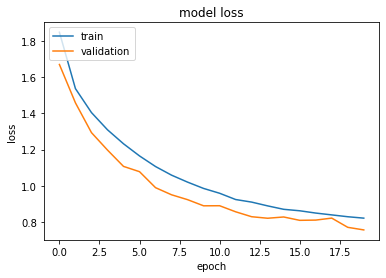

In [141]:
plotLosses(history)

## Task 3: Optimizing the Model

How could you change your model and training to improve performance?

It is a good idea to keep track of your experimental choices in a table


| Model Parameters                                                                                            | Training Accuracy | Test Accuracy |
|-------------------------------------------------------------------------------------------------------------|-------------------|---------------|
| 1. Add a new CONV2D with kernel 3 relu  as activation function - 15 epochs                                  | 0.84              | 0.58          |
| 2. Add a maxpool. 2,2 - 5 epochs                                                                            | 0.63              | 0.61          |
| 3. Add a maxpool. 2,2 - 15 epochs                                                                           | 0.75              | 0.61          |
| 4. Add dropout 0.5 - 15 epochs                                                                              | 0.69              | 0.66          |
| 5. Add 2 new dropouts of 0.25 and  0.5 - Add a new dense layer (256) - Add custom values to SGD - 15 epochs | 0.78              | 0.69          |
| 6. Add  1.  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'), 2. tf.keras.layers.Conv2D(64, 3, activation='relu'), 3. tf.keras.layers.Dense(512, activation='relu'), A dropout of 0.25, 5. Change the optimizer to RMSprop 6. 20 epochs| 0.72              | 0.74          |

Submit your table and your single best model.